### Training Decision Tree Model with Diabetes Data

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn import metrics  # Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import export_graphviz
import io
from IPython.display import Image
import pydotplus
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

Naming Unlabelled Data

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=1, names=col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [3]:
# split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree', 'age']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [4]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

In [5]:
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred)*100), '%')

Accuracy: 69.0 %


### Decision Tree Visualization

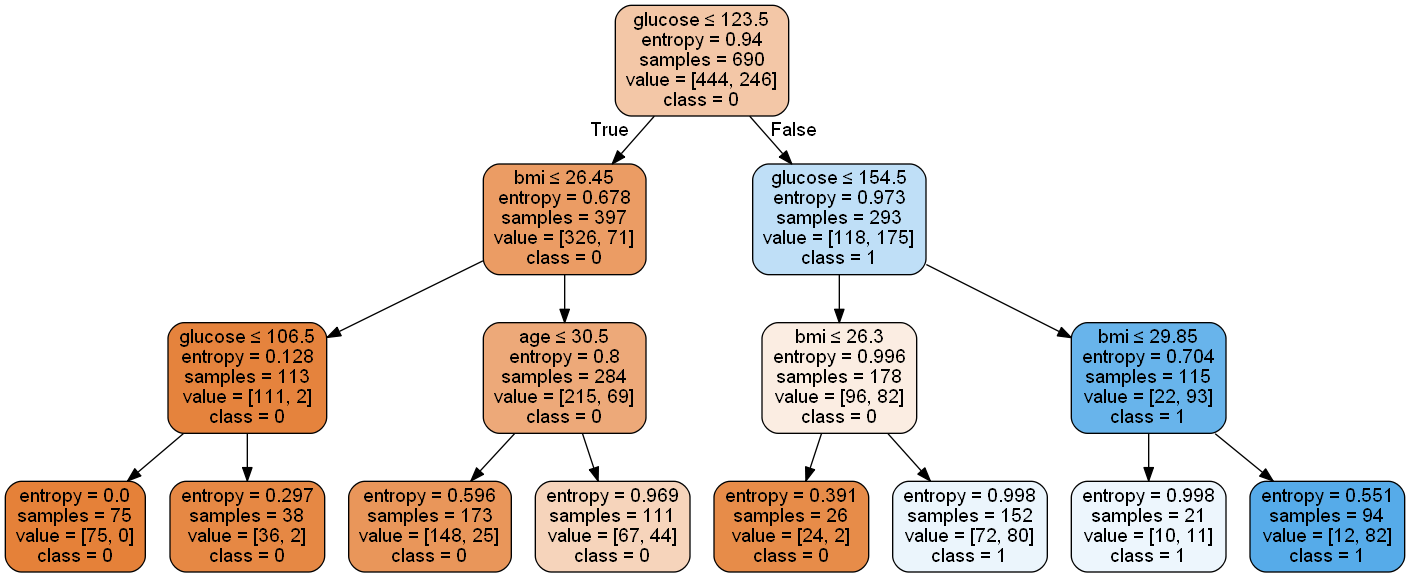

In [6]:
dot_data = io.StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_cols, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

### Python GUI for Decision Tree

In [7]:
from tkinter import *
import tkinter.messagebox as msgBox
import numpy as np

def predictModel():
    
    predict_input = pd.DataFrame(np.array([pregnancies.get(), glucose.get(), BloodPressure.get(),
                                          SkinThickness.get(), Insulin.get(), BMI.get(), DiabetesPedigreeFunction.get(),
                                          Age.get()]).reshape(1, -1))
       
    y_pred = clf.predict(predict_input)[0]
    if round(y_pred) == 1:
        msgBox.showinfo(title="Prediction", message="You have Diabetes according to Predictor")
    else:
        msgBox.showinfo(title="Prediction", message="You DONOT have Diabetes according to Predictor")
    

#window
tkWindow = Tk() 
tkWindow.minsize(300, 222)  
tkWindow.maxsize(300, 232)  
tkWindow.title('Diabetes Prediction Using Decision Tree')

pregnancies_label = Label(tkWindow, text="Number of Pregnancies").grid(row=1, column=0, sticky=W)
pregnancies = IntVar()
pregnanciesEntry = Entry(tkWindow, textvariable=pregnancies).grid(row=1, column=1)  


glucoseLabel = Label(tkWindow,text="Glucose Level").grid(row=2, column=0, sticky=W)  
glucose = DoubleVar()
glucoseEntry = Entry(tkWindow, textvariable=glucose).grid(row=2, column=1)  

BloodPressureLabel = Label(tkWindow,text="Blood Pressure Level").grid(row=3, column=0, sticky=W)  
BloodPressure = DoubleVar()
BloodPressureEntry = Entry(tkWindow, textvariable=BloodPressure).grid(row=3, column=1)  

SkinThicknessLabel = Label(tkWindow,text="SkinThickness").grid(row=4, column=0, sticky=W)  
SkinThickness = DoubleVar()
SkinThicknessEntry = Entry(tkWindow, textvariable=SkinThickness).grid(row=4, column=1)  

InsulinLabel = Label(tkWindow,text="Insulin").grid(row=5, column=0, sticky=W)  
Insulin = DoubleVar()
InsulinEntry = Entry(tkWindow, textvariable=Insulin).grid(row=5, column=1)  

BMILabel = Label(tkWindow,text="BMI").grid(row=6, column=0, sticky=W)  
BMI = DoubleVar()
BMIEntry = Entry(tkWindow, textvariable=BMI).grid(row=6, column=1)  

DiabetesPedigreeFunctionLabel = Label(tkWindow,text="DiabetesPedigreeFunction").grid(row=7, column=0, sticky=W)  
DiabetesPedigreeFunction = DoubleVar()
DiabetesPedigreeFunctionEntry = Entry(tkWindow, textvariable=DiabetesPedigreeFunction).grid(row=7, column=1)  

AgeLabel = Label(tkWindow,text="Age").grid(row=8, column=0, sticky=W)  
Age = DoubleVar()
AgeEntry = Entry(tkWindow, textvariable=Age).grid(row=8, column=1) 

submitButton = Button(tkWindow, text="FEED DATA", command=predictModel).grid(row=20, padx = 5, pady = 5, sticky=S)  

tkWindow.mainloop()

                                            Prepared by J.Haripriya